<img src="img/Recurso-26.png" width="200">

<span style="font-size:20px; font-family:sans-serif;">Instituto Superior Tecnológico Quito</span>



*Michael Borja* las plataformas</p>


<h1>Regresión Logística</h1>
Para nuestro ejercicio se ha creado un archivo csv que se les ha proporcionado con datos de entrada a modo de ejemplo para poder clasificar si un usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux.

<p>La información de entrada son 4 características que se tomó de una web que utiliza Google Analytics y son :</p>
<ul>
    <li>Duración de la visita en segundos. </li>
    <li>Cantidad de páginas vistas durante una sesión. </li>
    <li>Cantidad de Acciones del usuario (click, scroll, uso de checkbo, sliders, etc)</li>
    <li>Suma dek Valor de las acciones (Cada acción lleva asociada una valoración de importancia</li>
</ul>

<p>Como la salida es discreta, asignaremos los siguientes valores a las etiquetas</p>

<ul>
    <li> 0-Windows</li>
    <li> 1-Macintosh</li>
    <li> 2-Linux</li>
</ul>
<p>La muestra es pequeña: son 170 registros para poder comprender el ejercicio, pero recordemos que para conseguir buenos resultados es mejor contar con un número abundante de datos que darán mayor exactitud a las predicciones y evitarán problemas </p>

<h2>Requerimientos técnicos</h2>
<p>Para ejecutar el código necesitas tener instalado Python tanto la versión 2.7 0 3.6 y varios de los paquetes usados comúnmente en Data Science. Recomiendo tener instalada la suite de Anaconda, muy sencillas y con los paquetes para Data Science ya preinstalados y funcionan en todas las plataformas</p>


<h2>Identificar Sistema Operativo de los usuarios</h2>
<p>Para comenzar hacemos las importaciones con los paquetes que utilizaremos en el ejercicio</p>

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#Importa la biblioteca seaborn, que se utiliza para realizar visualizaciones estadísticas 
#avanzadas. Seaborn está construido sobre matplotlib, y proporciona una interfaz más 
#amigable y con mayor capacidad para crear gráficos informativos. Se le asigna el alias sb.
import seaborn as sb
%matplotlib inline

In [2]:
df= pd.read_csv(r"res/usuarios_win_mac_lin.csv")
df.head()
#df.shape

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


<p>Leemos el archivo csv (por sencilles , se considera que estará en el mismo directorio que el archivo de notebook) y lo asignamos mediante Pandas a la variable <br>df</br>. Mediante el método dataframe,head vemos en pantalla los 5 primeros registros</p>

<p>A continuación llamamos al método dataframe.describe() que nos dará algo de información estadística básica de nuestro set de datos. La media, el desvio estándar, valores mínimos y máximos de cada característica</p>

In [4]:
df.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


<p>Luego analizaremos cuantos resultados tenemos de cada tipo usando la función groupby y vemos que tenemos 86 usuarios "Clase 0", es decir Windows, 40 usuarios Mac y 44 de Linux</p>

In [5]:
print(df.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


<h1>Visualización de Datos</h1>
<p>Antes de empezar a procesar el conjunto de datos, vamos a hacer unas visualizaciones que muchas veces nos pueden ayudar a comprender mejor las características de la información con la que trabajamos y su correlación.</p>
<p>Primero visualizamos en formato de historial los cuatro Features de entrada con nombres “duración”, “páginas”,”acciones” y “valor” podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros.</p>

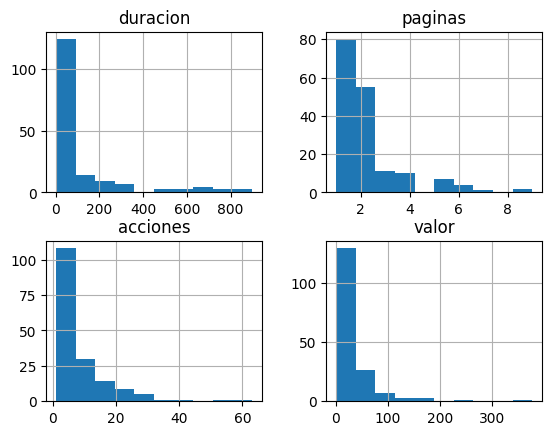

In [6]:
df.drop(['clase'],axis=1).hist()
plt.show()

<p>Y también podemos interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en verde y Linux en rojo.</p>

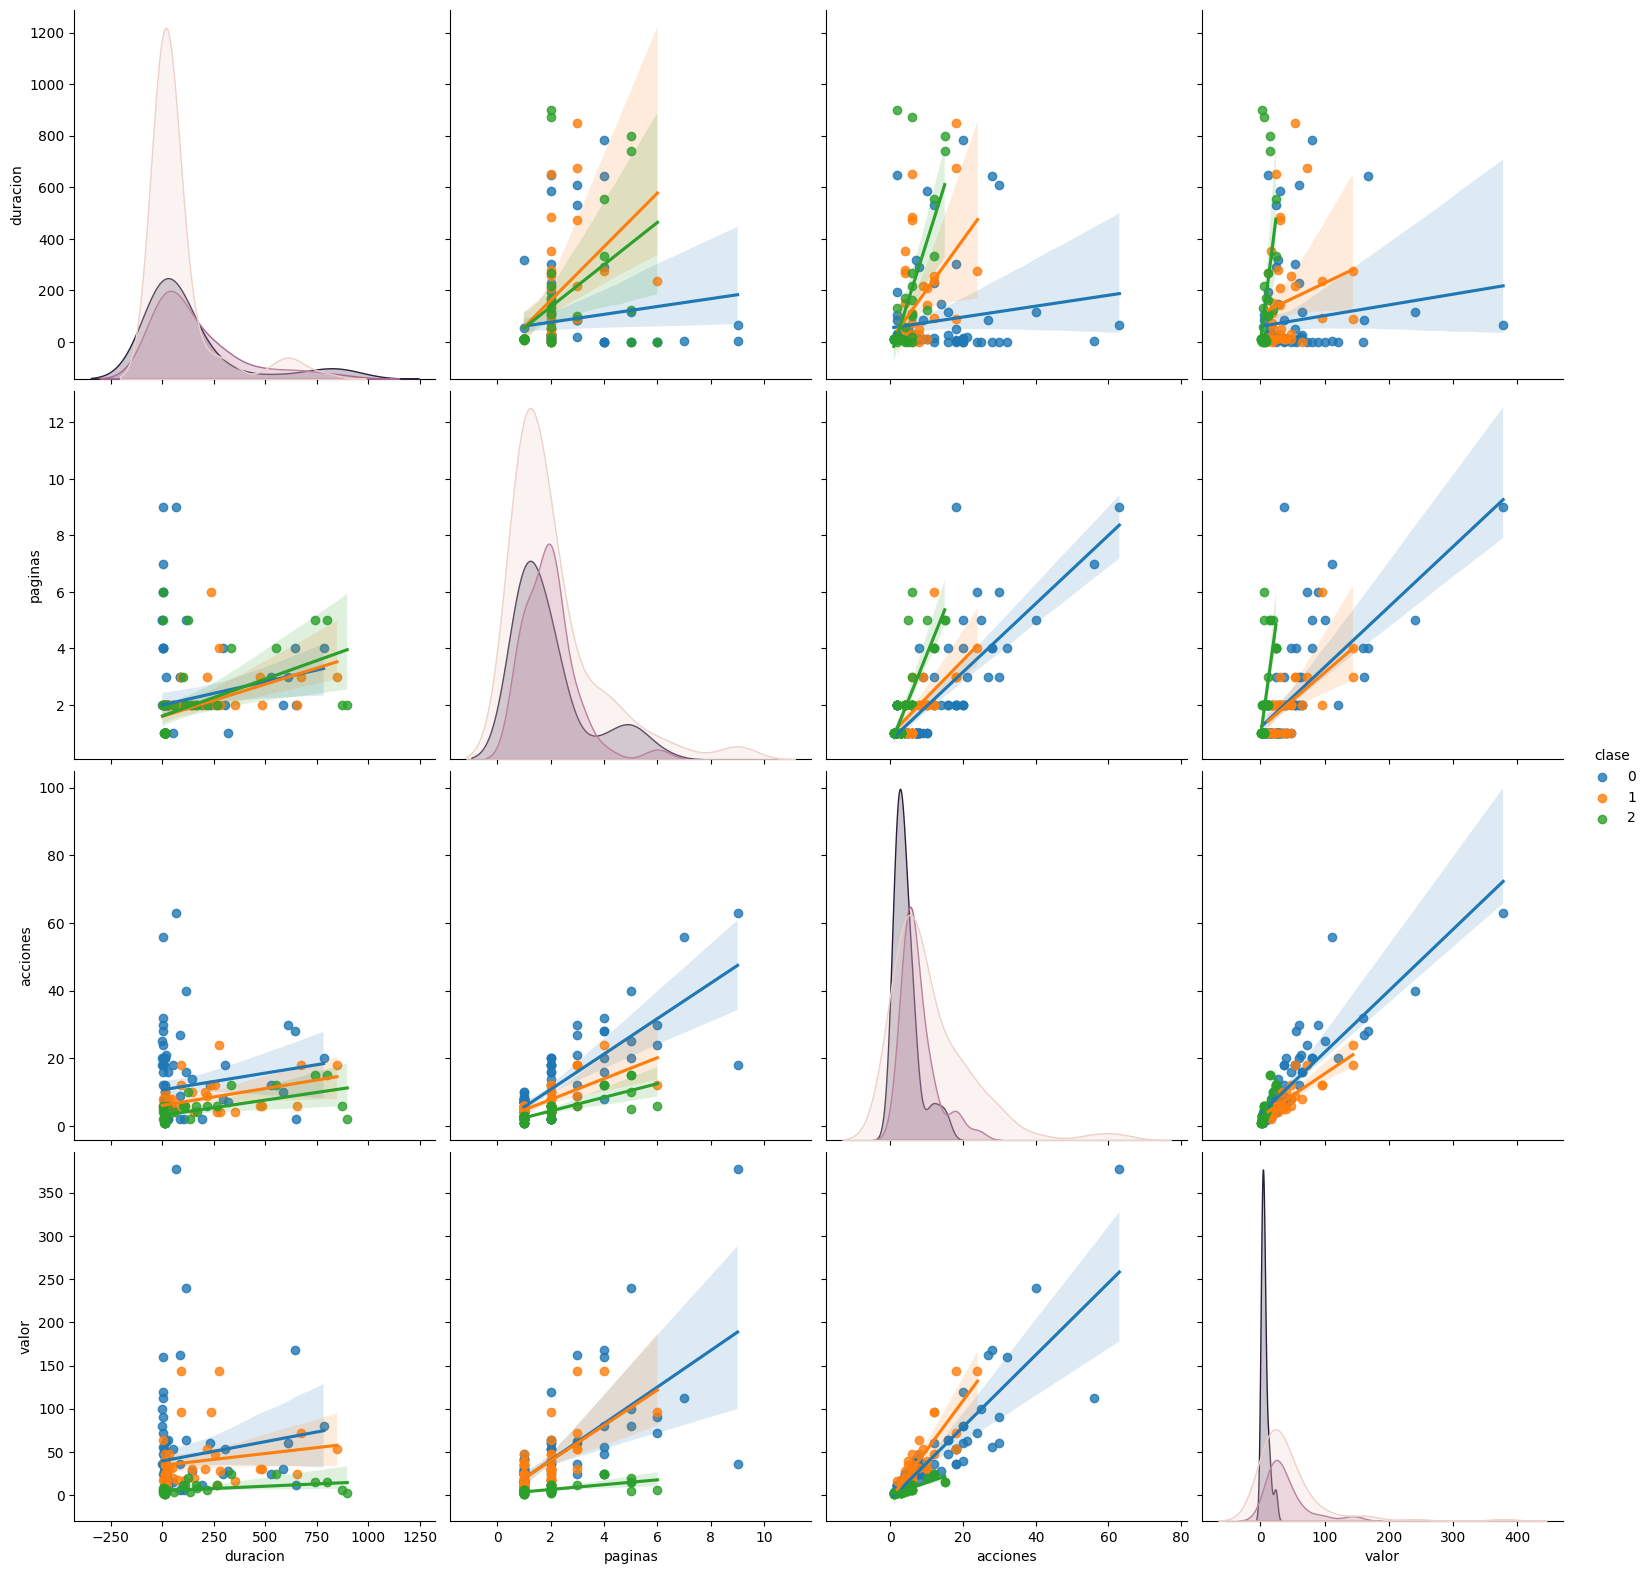

In [10]:
sb.pairplot(df.dropna(), hue='clase', height=4, vars=["duracion", "paginas", "acciones", "valor"],kind='reg')
plt.show()

<h1> Creamos el Modelo Rrgresión Logística</h1>
<p>Ahora cargamos las variables de las 4 columnas de entrada en X excluyendo la columna “clase” con el método drop(). En cambio agregamos la columna “clase” en la variable y. Ejecutamos X.shape para comprobar la dimensión de nuestra matriz con datos de entrada de 170 registros por 4 columnas.

</p>

In [11]:
# Se crea un array de NumPy a partir del DataFrame `dataframe` excluyendo la columna 'clase'.
# El método `drop(['clase'], axis=1)` elimina la columna 'clase' (axis=1 indica columnas).
# El objetivo es preparar los datos de entrada X (características) para el modelo de machine learning.
X=np.array(df.drop(['clase'],axis=1))
# Se crea otro array de NumPy que contiene exclusivamente la columna 'clase' del DataFrame.
# Este array `y` representa las etiquetas o valores objetivo que se utilizarán para entrenar el modelo.
y= np.array(df['clase'])
# Se obtiene la forma o las dimensiones del array `X`.
# Esto devuelve una tupla que indica cuántas filas y columnas tiene el array de características.
# Es útil para verificar que los datos se han cargado correctamente y tienen la estructura adecuada.
X.shape

(170, 4)

<p>Y creamos nuestro modelo y hacemos que se ajuste (fit) a nuestro conjunto de entradas X y salidas ‘y’.</p>

In [12]:

model=LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


<p>Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.</p>

In [14]:
predictions = model.predict(X)
print(predictions[:5])

[2 2 2 2 2]


<p>Y confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve la precisión media de las predicciones, en nuestro caso del 77%.

</p>

In [15]:
model.score(X,y)

0.7764705882352941

<h1>Validación de nuestro modelo </h1>
<p>Una buena práctica en Machine Learning es la de subdividir nuestro conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que nuestro algoritmo pueda fallar por “sobregeneralizar” el conocimiento.</p>
<p>
    Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar.
</p>

In [16]:
validation_size=0.20
seed=7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

<p>Volvemos a compilar nuestro modelo de Regresión Logística pero esta vez sólo con 80% de los datos de entrada y calculamos el nuevo scoring que ahora nos da 72%.</p>

In [17]:
name='Logistic Regression'
kfold=model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

C:\Users\ADMIN-ITQ\anaconda3\envs\machinelearning-1\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.720330 (0.151123)


Y ahora hacemos las predicciones -en realidad clasificación- utilizando nuestro “cross validation set”, es decir del subconjunto que habíamos apartado. En este caso vemos que los aciertos fueron del 85% pero hay que tener en cuenta que el tamaño de datos era pequeño.

In [18]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8529411764705882


Finalmente vemos en pantalla la “matriz de confusión” donde muestra cuantos resultados equivocados tuvo de cada clase (los que no están en la diagonal), por ejemplo predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows.

<h1>Reporte de Resultado del modelo </h1>

In [19]:
print(confusion_matrix(y_test, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


<p>También podemos ver el reporte de clasificación con nuestro conjunto de Validación. En nuestro caso vemos que se utilizaron como “soporte” 18 registros windows, 6 de mac y 10 de Linux (total de 34 registros). Podemos ver la precisión con que se acertaron cada una de las clases y vemos que por ejemplo de Macintosh tuvo 3 aciertos y 3 fallos (0.5 recall). La valoración que de aqui nos conviene tener en cuenta es la de F1-score, que tiene en cuenta la precisión y recall. El promedio de F1 es de 84% lo cual no está nada mal.</p>

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



# Clasificación (o predicción) de nuevos valores

Como último ejercicio, vamos a inventar los datos de entrada de  navegación de un usuario ficticio que tiene estos valores:
<ul>
    <li>Tiempo de duración: 10</li>
    <li>Páginas Visitadas: 3</li>
    <li>Acciones al navegar: 5</li>
    <li>Valoración : 9</li>
</ul>
Lo probamos en nuestro modelo y vemos que lo clasifica como un usuario tipo 2, es decir, de Linux.

In [23]:
X_new=pd.DataFrame({'duracion':[10], 'pagina':[3], 'acciones':[5], 'valor':[9]})
model.predict(X_new)

C:\Users\ADMIN-ITQ\anaconda3\envs\machinelearning-1\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([2])